In [2]:
import pandas as pd 
import numpy as np 
import plotly_express as px 

In [3]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2018-01-02,15.19,49.880001,9.623076,2.478125,10.030941,75.099998
1,2018-01-03,15.01,49.590000,9.476923,2.446875,10.243869,75.300003
2,2018-01-04,15.58,49.990002,9.384615,2.505625,10.180656,76.000000
3,2018-01-05,15.66,49.740002,9.423076,2.456250,10.400239,76.440002
4,2018-01-08,15.70,49.529999,9.500000,2.456562,10.393585,76.760002
...,...,...,...,...,...,...,...
1463,2023-12-20,8.60,3.840000,36.160000,2.100000,33.060001,126.820000
1464,2023-12-21,9.06,3.960000,36.389999,2.090000,33.349998,128.350006
1465,2023-12-22,9.14,3.960000,36.509998,2.120000,32.849998,128.940002
1466,2023-12-26,9.16,3.980000,36.720001,2.110000,33.529999,129.649994


In [4]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i]/ dataset_normalizado[i][0])

In [5]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,0.988150,0.994186,0.984812,0.987390,1.021227,1.002663
2,2018-01-04,1.025675,1.002205,0.975220,1.011097,1.014925,1.011984
3,2018-01-05,1.030941,0.997193,0.979217,0.991173,1.036816,1.017843
4,2018-01-08,1.033575,0.992983,0.987210,0.991299,1.036153,1.022104
...,...,...,...,...,...,...,...
1463,2023-12-20,0.566162,0.076985,3.757634,0.847415,3.295803,1.688682
1464,2023-12-21,0.596445,0.079391,3.781535,0.843380,3.324713,1.709055
1465,2023-12-22,0.601712,0.079391,3.794005,0.855485,3.274867,1.716911
1466,2023-12-26,0.603028,0.079791,3.815828,0.851450,3.342657,1.726365


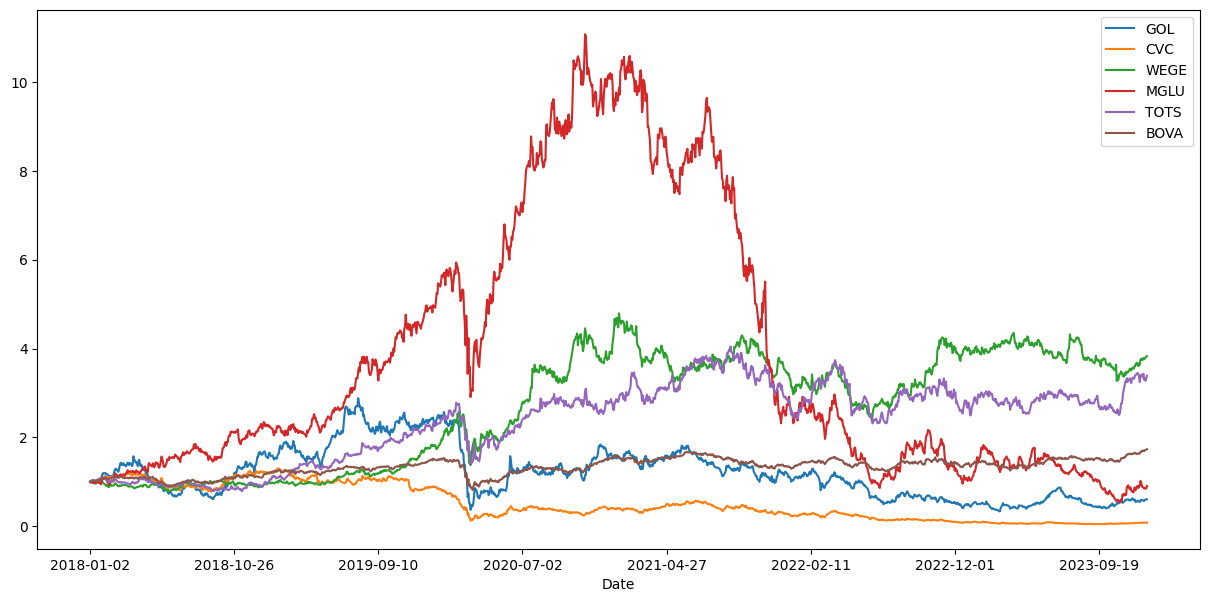

In [6]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [7]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [9]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1))-1

In [10]:
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.011850,-0.005814,-0.015188,-0.012610,0.021227,0.002663
2,0.037975,0.008066,-0.009740,0.024010,-0.006171,0.009296
3,0.005135,-0.005001,0.004098,-0.019706,0.021569,0.005790
4,0.002554,-0.004222,0.008163,0.000127,-0.000640,0.004186


In [11]:
retorno_anual = retorno_carteira.mean()*246
retorno_anual

GOL     0.177179
CVC    -0.169161
WEGE    0.291723
MGLU    0.188574
TOTS    0.288043
BOVA    0.125916
dtype: float64

In [12]:
retorno_anual = retorno_anual*100
retorno_anual

GOL     17.717950
CVC    -16.916113
WEGE    29.172263
MGLU    18.857412
TOTS    28.804325
BOVA    12.591577
dtype: float64